# Numerical Differentiation and Integration
## Lecture 10

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Consider

$$\begin{align}
y &= x^4 \\
y'(x) &= 4 x^3
\end{align}$$

The derivative at $x=2$ is $y'(2) = 4(2)^3 = 32$.

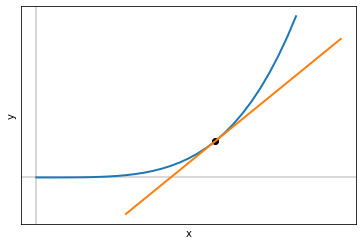

In [142]:
plt.axhline(0, color='k', alpha=0.2)
plt.axvline(0, color='k', alpha=0.2)

x = np.arange(0, 3, 0.1)
y = x**4
plt.plot(x, y, linewidth=2)
plt.plot(2, 2**4, 'ko')

x_tangent = np.arange(1, 3.5, 0.1)
y_tangent = 2**4 + 32*(x_tangent-2)
plt.plot(x_tangent, y_tangent, linewidth=2)

plt.xticks([])
plt.yticks([])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

What if we couldn't get $y'(x)$ analytically?

Recall

$$ y'(x) = \lim_{h \rightarrow 0} \frac{y(x + h) - y(x)}{h} $$

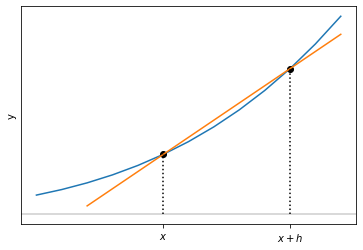

In [141]:
plt.axhline(0, color='k', alpha=0.2)

x = np.arange(1.5, 2.7, 0.1)
y = x**4
plt.plot(x, y)

plt.plot(2, 2**4, 'ko')
plt.plot(2.5, 2.5**4, 'ko')

x_tangent = np.arange(1.7, 2.8, 0.1)
y_tangent = 2**4 + (2.5**4 - 2.0**4)/(2.5 - 2)*(x_tangent-2)
plt.plot(x_tangent, y_tangent)

plt.plot([2, 2], [0, 2**4], 'k:')
plt.plot([2.5, 2.5], [0, 2.5**4], 'k:')
plt.xticks([2, 2.5], ['$x$', '$x+h$'])
plt.yticks([])
plt.ylabel('y')
plt.show()

To approximate $y'(x)$, we just use a small but finite $h$.

$ h = 0.1 $

$$ y'(2) \approx \frac{y(2.1) - y(2)}{0.1} = \frac{19.4481 - 16}{0.1} = 34.48 $$

$ h = 0.01 $

$$ y'(2) \approx \frac{y(2.01) - y(2)}{0.1} = \frac{16.3224 - 16}{0.01} = 32.24 $$

As $h$ decreases, our approximation improves. 

However, making $h$ too small does not work as we shall see later.

### Example: function without an (elementary) derivative

For example, consider a *special function* such as the Bessel function of the first kind of order 1, 

$$ y = J_1(x)$$

In [78]:
from scipy.special import jv

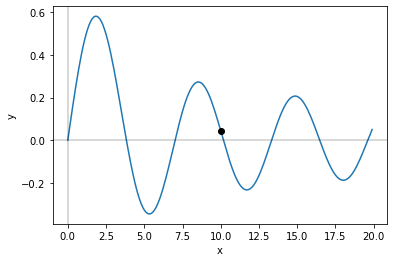

In [286]:
x = np.arange(0, 20, 0.1)
y = jv(1, x)

plt.plot(x, jv(1, x))
plt.axhline(0, color='k', alpha=0.2)
plt.axvline(0, color='k', alpha=0.2)

plt.plot(10, jv(1, 10), 'ko')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Derivative schemes

Approximations to a derivative can be obtained by expanding a function using Taylor series. Here are three schemes for calculating numerically the derivative of a continuous functions. These are called the forward, backward and centered difference schemes. 

#### forward difference

$$ \frac{f(x+h )-f(x)}{h}$$

#### backward difference

$$ \frac{f(x) - f(x - h)}{h}$$

#### centered difference
$$ \frac{f(x+h)-f(x-h)}{2 h}$$

where $f(x)$ is some smooth function at we are approximating the derivative at the point $x=x_0$.

Many such schemes are possible

#### five-point formula

$$ \frac{1}{12 h} \left( \frac{}{} f(x-2h) - 8f(x-h) + 8f(x+h) - f(x+2h) \frac{}{}  \right) $$

## Differentiating data

Suppose we have data e.g. velocity versus time, where the independent variable is equally spaced between points.

|| $t$ | $v$ | |
|-|--|--| -- |
|$t_0$ | 0.1 | 3.0 | $v_0$ |
|$t_1$ | 0.2 | 3.5 | $v_1$ |
|$t_2$ | 0.3 | 3.8 | $v_2$ |
|$t_3$ | 0.4 | 2.6 | $v_3$ |
|$t_4$ | 0.5 | 2.8 | $v_4$ |
|$t_5$ | 0.6 | 1.4 | $v_5$ |


here $h = \Delta t = 0.1$ is set by the data. We can't change it.

Using the forward difference scheme, we can approximate the acceleration $\left( \frac{dv}{dt} \right)$ at, say $t=0.2$ as

$$\frac{v(0.2 + 0.1) - v(0.2)}{0.1}$$

or in terms of our data points

$$\frac{v_2 - v_1}{t_2 - t_1} = \frac{3.8 - 3.5}{0.1} = \frac{0.3}{0.1} = 3 $$

*Notice that when we substract two similar numbers, we lose precision; taking derivatives results in noiser output.*

### Storing numerical data in memory

There are several ways to store data in Python. The simplest is probably a list of lists as follows:

In [168]:
vdata = [ [0.1, 3.0], 
          [0.2, 3.5],
          [0.3, 3.8],
          [0.4, 3.6],
          [0.5, 2.8],
          [0.6, 1.4] ]

Rembering that Python counts starting at zero, we can identify any particular time value as `vdata[n][0]` and any particular velocity value as `vdata[n][1]`.

In [173]:
vdata[1][0]

0.2

In [174]:
vdata[1][1]

3.5

Or consider the data as a pair

In [170]:
vdata[1]

[0.2, 3.5]

While this works, it is *very* inefficient for numerial data and should not be used.

An improvement would be use Numpy arrays.

In [200]:
vdata = np.array([ [0.1, 3.0], 
                   [0.2, 3.5],
                   [0.3, 3.8],
                   [0.4, 3.6],
                   [0.5, 2.8],
                   [0.6, 1.4] ])

We can look up individual values the same was a with lists

In [201]:
vdata[1][0]

0.2

In [202]:
vdata[1][1]

3.5

Or as a ordered pair

In [203]:
vdata[1]

array([0.2, 3.5])

The data though is now in a numerical array

In [204]:
vdata

array([[0.1, 3. ],
       [0.2, 3.5],
       [0.3, 3.8],
       [0.4, 3.6],
       [0.5, 2.8],
       [0.6, 1.4]])

Looking up the a particular value can be made a little more compact. The notation `vdata[n, 1]` also works for Numpy arrays

In [206]:
vdata[1, 0]

0.2

If we just want all of the velocity values we can use slicing:

In [208]:
vdata[0:6, 1]

array([3. , 3.5, 3.8, 3.6, 2.8, 1.4])

Even more simply

In [209]:
vdata[:, 1]

array([3. , 3.5, 3.8, 3.6, 2.8, 1.4])

or to get a time, velocity pair

In [210]:
vdata[1, :]

array([0.2, 3.5])

Arrays (or, if really needed, lists) can also be structured as all of values for one variable together:

In [213]:
vdata = np.array( [
    [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
    [3.0, 3.5, 3.8, 3.6, 2.8, 1.4]
])

In [214]:
vdata

array([[0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
       [3. , 3.5, 3.8, 3.6, 2.8, 1.4]])

This just the transpose of the first way of looking at the data.

In [215]:
vdata.T

array([[0.1, 3. ],
       [0.2, 3.5],
       [0.3, 3.8],
       [0.4, 3.6],
       [0.5, 2.8],
       [0.6, 1.4]])

This flexibility can sometimes make it challenging to figure out if a velocity value is `vdata[1, 0]` or `vdata[0, 1]`

In [220]:
vdata[1, 0]

3.0

In [221]:
vdata[0, 1]

0.2

To keep things clear, we can split our array up by columns

In [226]:
t, v = vdata

In [223]:
t

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

In [224]:
v

array([3. , 3.5, 3.8, 3.6, 2.8, 1.4])

Try `t, v = vdata.T`. Why does it give an error?

In [227]:
t, v = vdata.T

ValueError: too many values to unpack (expected 2)

While using one Python variable for every physical variable may be sufficient in a case with just $t$ and $v$ data, in a real experiments or a numerical simulation there could be many more variables (e.g. $t, x, y, z, v_x, v_y, v_z, \ldots)$ and it can be a good ideal to keep all of the data together in one *data structure*.

Using a Python dictonary can be a good way to organize your data. We had be doing this to pass back the state of our numerical model using `yield` but a dictionary can also hold Numpy arrays.

In [244]:
vdata_dict = {'t' : t, 
             'v' : v }

In [245]:
vdata_dict

{'t': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]),
 'v': array([3. , 3.5, 3.8, 3.6, 2.8, 1.4])}

This idea of have Numpy arrays (the values) identified by the the name of the variable (the keys) is really exactly what we get when we use a Pandas dataframe.

In [246]:
vdata = pd.DataFrame(data_dict)

In [247]:
vdata

,t,v
0,0.1,3.0
1,0.2,3.5
2,0.3,3.8
3,0.4,3.6
4,0.5,2.8
5,0.6,1.4


Besides giving a nice way to display your data, Pandas dataframes support a lot of very useful operations for time series so are especially useful for observation datasets.

#### Calculating accleration

We now have our data in a dataframe

In [250]:
vdata

,t,v
0,0.1,3.0
1,0.2,3.5
2,0.3,3.8
3,0.4,3.6
4,0.5,2.8
5,0.6,1.4


The acceleration at $t=0.2$ would be (using forward difference) 

In [252]:
(vdata.v[2] - vdata.v[1]) / (vdata.t[2] - vdata.t[1])

2.9999999999999987

A function that takes an arbitrary dataframe and calculates the forward difference at an arbitrary point might look like

In [255]:
def fd(data, i):
    return (data.v[i+1] - data.v[i]) / (data.t[i+1] - data.t[i])

So

In [256]:
fd(vdata, 1)

2.9999999999999987

gives the acceleration at $t = 0.2$

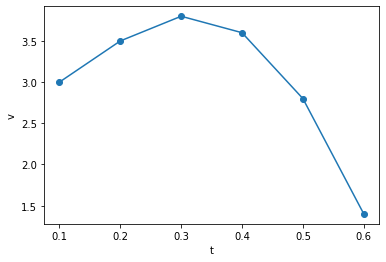

In [277]:
plt.plot(vdata.t, vdata.v, 'o-')
plt.xlabel('t')
plt.ylabel('v')
plt.show()

To calculate the acceleration for each time we need to loop through the data.

First we create an new column in the dataframe that will contains the acceleration.

In [268]:
vdata['a'] = np.nan

In [271]:
n = len(vdata)
for i in range(n-1):
    vdata['a'][i] = fd(vdata, i)

Notice that $ i =0, 1, 2, 3, 4$ in this example. We don't go to the last row because the forward difference depends on the next row as well.

In [273]:
vdata

,t,v,a
0,0.1,3.0,5.0
1,0.2,3.5,3.0
2,0.3,3.8,-2.0
3,0.4,3.6,-8.0
4,0.5,2.8,-14.0
5,0.6,1.4,NaN


Text(0, 0.5, 'a')

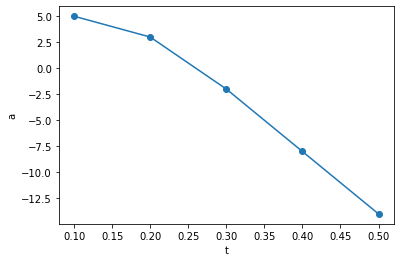

In [276]:
plt.plot(vdata.t, vdata.a, 'o-')
plt.xlabel('t')
plt.ylabel('a')
plt.show()

### Computing derivatives of functions

Let's go back and compute the derivative of the order-1 Bessel function of the first kind.

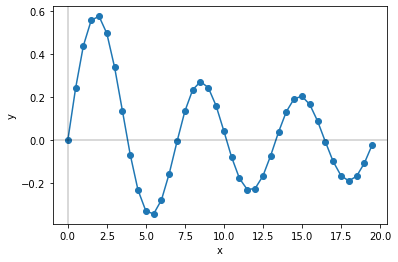

In [287]:
x = np.arange(0, 20, 0.5)
y = jv(1, x)

plt.plot(x, jv(1, x), 'o-')
plt.axhline(0, color='k', alpha=0.2)
plt.axvline(0, color='k', alpha=0.2)

plt.xlabel('x')
plt.ylabel('y')
plt.show()

In this case, the Numpy arrays `x` and `y` contain the points of the function,. 

Numpy arrays are still good to use. As long you are clear about which variable is which, dataframes do not have to be used.

Let's define a function that computes the centred difference scheme to approximate the derivative.

In [292]:
def fc(x, y, i):
    return (y[i+1] - y[i-1]) / (x[i+1] - x[i-1])

To compute the derivative at $x_{8}$ we call

In [295]:
fc(x, y, 8)

-0.36843795928569784

**Note:**

**In Python functions use round brackets, (), to pass in arguments.** 

**Arrays (and lists, dictionaries, and dataframes) use square brackets, [], to look up a value.**

**A common error is to confuse arrays with functions and vice versa.**

So we can loop through all of the points to compute the derivative $J_1'(x)$.

Again, we start by creating an array to hold the values of derivative that we are about to calculate.

The following creates an array the same size as `x` and `y` which all of the values initialized to NaN's.

In [315]:
n = len(x)
dydx = np.ones(n) * np.nan

Then we can fill in the values of the array

In [316]:
for i in range(1, n-1):
    dydx[i] = fc(x, y, i)

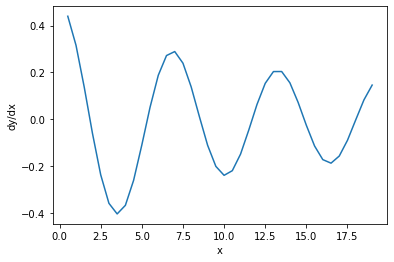

In [318]:
plt.plot(x, dydx)
plt.xlabel('x')
plt.ylabel('dy/dx')
plt.show()

## Numerical integration: Rectangle rule

The simplest algorithm to estimate numerically a definite integral of this sort

$$\int_a^b f(x) dx$$

is to divide the area between 

$$f(a)$$ and  $$f(b)$$ into 

$n$ rectangles of constant width 

$$\Delta x = (b-a)/n$$

and heights $f(x_0)$, $f(x_2)$, $f(x_3)$, $\ldots$, $f(x_{n-1})$

and to sum the areas of these rectangles. 

This leads to the following approximation called the rectangle rule


$$ \int_a^b f(x) dx \approx [f(x_0)+f(x_2)+f(x_3) + \dots +f(x_{n-1})] \Delta x = \sum_{i=0}^{n-1} f(x_i)\Delta x $$

where
	
$$ x_i=a + i \Delta x $$

Let's create our own function that will achieve this type of numerical integration. Call this function `NIRect` for Numerical Integration using the Rectangle rule. Create this function with the following four arguments

- `f`: the function that we want to integrate numerically
- `a`: the lower limit of integration
- `b`: the upper limit of integration
- `n`: the number of elements (i.e. rectangles) to use for the integration

Your function may look like this:

In [ ]:
def NIRect(f, a, b, n):
    dx = (b-a)/n
    sum = 0
    for i in range(n):
        sum += f(a + i*dx) * dx
   
    return sum

Here's how you can use this function. First define the function that you need to integrate, say 

sin(x) from 0 to $\pi/2$, and then call `NIRect` with the appropriate arguments. Let's use only 10 rectangles, i.e.,

In [ ]:
f = np.sin
a = 0
b = np.pi / 2
n = 10

NIRect(f, a, b, n)

The integral

$$\int_0^{\pi/2} \sin (x) dx$$

 can in fact be integrated analytically and we know that the exact answer should be 

$$ -\cos(\pi/2) + \cos(0) = 1 $$

We see that using the rectangle rule with 10 rectangles returns 0.919403, which is an error of roughly 8% compared to the exact solution which is exactly 

#### 1. Let's try with 100 rectangles

In [ ]:
f = np.sin
a = 0
b = np.pi / 2
n = 100

NIRect(f, a, b, n)

We see that increasing the number of rectangles produces a more accurate results. Yet, it is not 1. In fact, it will never be 1 unless you use an infinite number of rectangles. So, when doing numerical calculations like this there is always the issue of determining when to stop the integration. For example, if we use 10 billion rectangles the computer may take days to perform the integration. There is always a trade off between limits of computational power and accuracy needed for your application.  

Note that we don't need to use the variable `f` for the input function. Here's another example with a function that cannot be integrated analytically

$$ g(x) = \frac{1}{x^2} e^{x^2} $$

In [ ]:
def g(x):
    return 1/x**2 * np.exp(x**2)

a = 1
b = 2
n = 10

NIRect(g, a, b, n)

Notice how I called my function `NIRect` this time with the variable name `g` even though the function is originally defined with the variable `f`. This illustrates the power and flexibility of defining functions. Same can be said with the other arguments. For example `a` and `b` can really be anything else. For example

In [ ]:
def MyFunction(y):
    return 3*y**2 + y

LowerLimit = 2.3
UpperLimit = 10.2
NumRectangles = 100

NIRect(MyFunction, LowerLimit, UpperLimit, NumRectangles)


### Lambda functions

Often, these one-liner functions like `g` and `MyFunction` are defined as lambda functions:

In [ ]:
g = lambda x: 1/x**2 * np.exp(x**2)
a = 1
b = 2
n = 10
NIRect(g, a, b, n)

Note that the values can also be passed directly if you really wanted

In [ ]:
NIRect(lambda y: 3*y**2 + y, 2.3, 10.2, 100)

## Numerical integration: Trapezoidal rule

A more accurate method for solving an integral is to use $n$ trapezoids instead of $n$ rectangles. You should understand where this formulation comes from.

$$\int_a^b f(x) dx \approx \Delta x \left (\frac{1}{2} f(x_0) + \frac{1}{2} f(x_n)+ \sum_{i=1}^{n-1} f(x_i) \right) $$

where as in the rectangle rule

 
 $$\Delta x = (b-a)/n$$

and

 	

$$x_i=a + i \Delta x.$$

Note how although we use $n$ trapezoids the function needs to be evaluated up to 
 $f(x_n)$ whereas in the rectangle rule the function only needed to be evaluated up to 
 $f(x_{n-1})$. Can you tell why?

Here's how this can be coded within a new function that called `NITrap`

In [ ]:
def NITrap(f, a, b, n):
    dx = (b-a)/n
    sum = 0.5*(f(a) + f(b)) * dx
    for i in range(1, n):
        sum = sum + f(a + i*dx) * dx
   
    return sum

In [ ]:
f = np.sin
a = 0
b = np.pi / 2
n = 1000

print(NIRect(f, a, b, n))
print(NITrap(f, a, b, n))

From these outputs it is quite clear that the trapezoid rule is more accurate using the same number of trapezoids as the rectangle rule.

## Integrating data

Back to our data stored in `vdata`

In [319]:
vdata

,t,v,a
0,0.1,3.0,5.0
1,0.2,3.5,3.0
2,0.3,3.8,-2.0
3,0.4,3.6,-8.0
4,0.5,2.8,-14.0
5,0.6,1.4,NaN


6 points, so 5 trapezoids

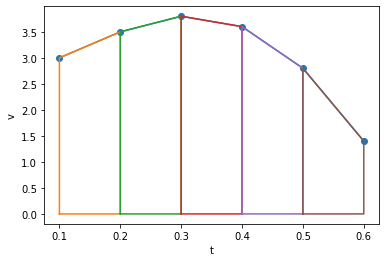

In [322]:
plt.plot(vdata.t, vdata.v, 'o-')

n = len(vdata)
for i in range(n-1):
    plt.plot([vdata.t[i], vdata.t[i+1], vdata.t[i+1], vdata.t[i], vdata.t[i]],
              [0, 0, vdata.v[i+1], vdata.v[i], 0])
    
plt.xlabel('t')
plt.ylabel('v')
plt.show()

The displacement from $t_0=0.1$ to $t_5= 0.6$ is


$$ \Delta x = \int_{0.1}^{0.6} v(t) dt  \approx \Delta t \left ( \frac{1}{2} v_0 + \frac{1}{2} v_5+ \sum_{i=}^{5} v_i \right)$$

A function that integrates an arbitrary dataframe of data might look like

In [326]:
def NITrapData(data):
    
    dt = data.t[1] - data.t[0]
    
    n = len(data)
    
    sum = data.v[0]/2 + data.v[n-1]/2
    
    for n in range(1, n-1):
        sum += data.v[n]
        
    sum = dt * sum
    
    return sum

So the displacement from $t = 0.1$ to $ t = 0.6$ is

In [334]:
displacement = NITrapData(vdata)
print("displacement = {:.3f}".format(displacement))

displacement = 1.590


## Comparing rectangle rule and trapezoid rule

The goal of this section is to compare visually the error associated with the rectangle and the trapezoidal rule as a function of the number of elements (rectangles or trapezoids) used. This will require some coding.  

The integral to evaluate is

$$\int_a^b f(x) dx $$

where


$$ f(x)= \sin(x) + x^3, \quad a=0, \quad  b =5 $$

##### Exercise to be done as a class.

#### 1. Define $f(x)$ as Python function.

#### 2. Plot this function between  x=-10 and x=10.

#### 3. Calculate the exact value of the integral above (with a=0 and b=5)

#### 4. Evaluate numerically the integral using the rectangle rule with 10 rectangles. 

#### 5. Evaluate numerically the integral using the trapezoid rule with 10 trapezoids.

#### 6. Briefly comment on the answers you obtained in 4. and 5. 

#### 7. The absolute relative error of the numerical integration can be calculated as follow: 

$\Delta$ =|Numerical Solution - Exact Solution|/|Exact Solution|

Code this expression for the relative error and calculate $\Delta$ for the results obtained in 4. and 5. above.

#### 8. Redo the same as in 7. but this time calculate the error when using 100 rectangles or trapezoids to evaluate the integral.

#### 9. It should be clear from your previous calculations that the error reduces significantly by increasing the number of elements and that the trapezoid rule is always more accurate than the rectangle rule.  

What would be illuminating would be to plot the relative error for each algorithms (i.e. rectangle and trapezoid rules) as a function of the number $n$ of elements used to approximate numerically the integral. Before coding this you need to become a little more familiar with NumPy arrays.

First, use the `np.arange` function  to automatically create the array: [1,2,3,4,5,6,7,8,9,10]

Now, starting from this first array and multiplying, create the array: [2,4,6,8,10,12,14,16,18,20]

Instead, try and create the array [2,4,8,16,32,64,128,256,512,1024]

#### 10. Next, the challenge is to create a two column matrix with the first column containing the number $n$ of elements used in the numerical integration and in the second column the relative error $\Delta$.  

(This can be done with or without loops.)



Now you can plot the results of this analysis like this:

#### 11. Redo the same analysis with a graph for the trapezoid rule.

#### 12. Finally compare the results obtained in 11 for the rectangle rule and in 12 for the trapezoid rule on a single graph. Draw a brief conclusion to the results obtained graphically.

Comment: The trapezoidal rule converges much faster than the rectangle rule to the exact solution.